## Oppstart

### Preamble

Contains imports and some utility code.

In [66]:
from dhlab.module_update import update, css, code_toggle

In [67]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [68]:
import pandas as pd

In [69]:
css()

In [70]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [71]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [72]:
collword = 'demokrati'

In [73]:
korpus = nb.book_urn(words=[collword], ddk='3%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [74]:
nb.dewey("300")

{'1': ['3', 'Samfunnsvitenskap'],
 '2': ['30', 'Samfunnsvitenskap, sosiologi og antropologi'],
 '3': ['300', 'Samfunnsvitenskap']}

In [75]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2013013006015,"Apenes, Georg",Fra tillit til kontroll,2005
1,2014110608067,"Isungset, Odd",Attentatet,2000
2,2014013008115,"Eriksen, Knut Einar",finske fare,1981
3,2009061004031,"Veiden, Pål",Aspekter av sosial ulikhet,2003
4,2013013105013,"Kleven, Hans I.",vitenskapelig-tekniske revolusjon,1980
5,2007070201080,,Scando-Americana,1980
6,2015050408177,"Thoresen, Marianne",Om barns frihet til å foreta egne valg,2006
7,2008061304009,"Strandenes, Gunnar",Dødsdømt av Rikskrigsretten i Berlin,1995
8,2012072409049,"McKenzie, Nigel",Moderne byteori,1981
9,2014070306119,,Lesebok for levende,2002


In [76]:
nb.urn_concordance(word=collword, urns=korpus)

"Fra tillit til kontroll, Apenes, Georg, 2005",De som i et liberalt,demokrati,som vårt handler på vegne
"Fra tillit til kontroll, Apenes, Georg, 2005",- for å lære bort,demokrati,! Samtalen kom der inn
"Fra tillit til kontroll, Apenes, Georg, 2005",kunne understreke at i et,demokrati,som vårt må den ene
"Fra tillit til kontroll, Apenes, Georg, 2005",hemmeligheter viktig for et liberalt,demokrati,som vårt ?
"Fra tillit til kontroll, Apenes, Georg, 2005",". Kampen for frihet ,",demokrati,og rettssikkerhet avblåses ikke -
"Attentatet, Isungset, Odd, 2000",en forutsetning for et levende,demokrati,.
"finske fare, Eriksen, Knut Einar, 1981",som uforenlig med et moderne,demokrati,. Samebevegelsens økende aktivitet og
"Aspekter av sosial ulikhet, Veiden, Pål, 2003",blitt karakterisert som et konsosiert,demokrati,( Lijphart 1977 ) .
"Aspekter av sosial ulikhet, Veiden, Pål, 2003",begrepet konsensus-demokrati isteden for konsosiert,demokrati,. Som han skriver selv
"Aspekter av sosial ulikhet, Veiden, Pål, 2003",", karakteriserte det borgerlige parlamentariske",demokrati,som overtroisk frase fra det
"Aspekter av sosial ulikhet, Veiden, Pål, 2003",er likevel at det parlamentariske,demokrati,var fra regjeringens side planlagt


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [77]:
small_window = 5
large_window = 10

In [78]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [79]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [80]:
small.head()

,0
.,1522
",",1508
og,1504
i,893
et,619


In [81]:
large.head()

,0
.,2870
",",2679
og,2431
i,1673
som,1138


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [82]:
delta = pd.DataFrame()

In [83]:
delta['small'] = small[0]
delta['large'] = large[0]

In [84]:
delta['ratio'] = small[0]/large[0]

In [85]:
#delta['log'] = np.log(delta['ratio'])

In [86]:
#delta['score'] = delta['ratio'] * delta['log']

In [87]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
forståelser,3,3,1.000000
X.2.2,6,6,1.000000
selvhjelp,3,3,1.000000
sannhetssøken,3,3,1.000000
5.,3,3,1.000000
...,...,...,...
forutsetning,22,36,0.611111
A,11,18,0.611111
Som,14,23,0.608696
fikk,14,23,0.608696


In [88]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",1508,2679,0.562897
.,1522,2870,0.530314
og,1504,2431,0.618675
!,15,23,0.652174
?,116,188,0.617021


In [89]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [90]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [91]:
delta_max.head(20)

,small,large,ratio
representativt,36,37,0.972973
Smith,56,58,0.965517
industrielt,33,35,0.942857
deliberativt,64,68,0.941176
likestilling,29,31,0.935484
Journalistikk,14,15,0.933333
kampen,14,15,0.933333
parlamentariske,25,27,0.925926
18,12,13,0.923077
Makt,24,26,0.923077


In [92]:
delta_const

,small,large,ratio
forståelser,3,3,1.000000
X.2.2,6,6,1.000000
selvhjelp,3,3,1.000000
sannhetssøken,3,3,1.000000
5.,3,3,1.000000
...,...,...,...
forutsetning,22,36,0.611111
A,11,18,0.611111
Som,14,23,0.608696
fikk,14,23,0.608696


In [93]:
delta_max.head(50).index

Index(['representativt', 'Smith', 'industrielt', 'deliberativt',
       'likestilling', 'Journalistikk', 'kampen', 'parlamentariske', '18',
       'Makt', 'Samer', 'kap.', 'opplæring', 'Kommunikativ', 'Nordisk',
       'Deliberativt', 'representative', 'Digitalt', 'liberale', 'levende',
       'fremme', 'reelt', 'idealene', 'læring', 'omkring', 'Fagbokforlaget',
       'synet', 'gjaldt', '113', 'menneskerettigheter', 'fungere',
       'elektronisk', 'sto', 'fred', 'vårt', 'skoler', 'overgangen',
       'mangelen', 'fleste', 'største', 'utvidet', 'lenge', 'kommunikasjon',
       'krevde', 'Knut', 'velger', 'valgte', 'arbeidsplassen', 'diskurser',
       'borgerlig'],
      dtype='object')

In [94]:
delta_const.head(150).index

Index(['forståelser', 'X.2.2', 'selvhjelp', 'sannhetssøken', '5.', 'genom',
       'samfunnsforskning', 'samarbeide', 'reell', 'samfunnsdebatt',
       ...
       'nar', 'opprettholde', 'omfatte', 'uendelig', 'livlig', 'nådd',
       'forenlig', 'tilstand', 'Jurgen', 'Jostein'],
      dtype='object', length=150)

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

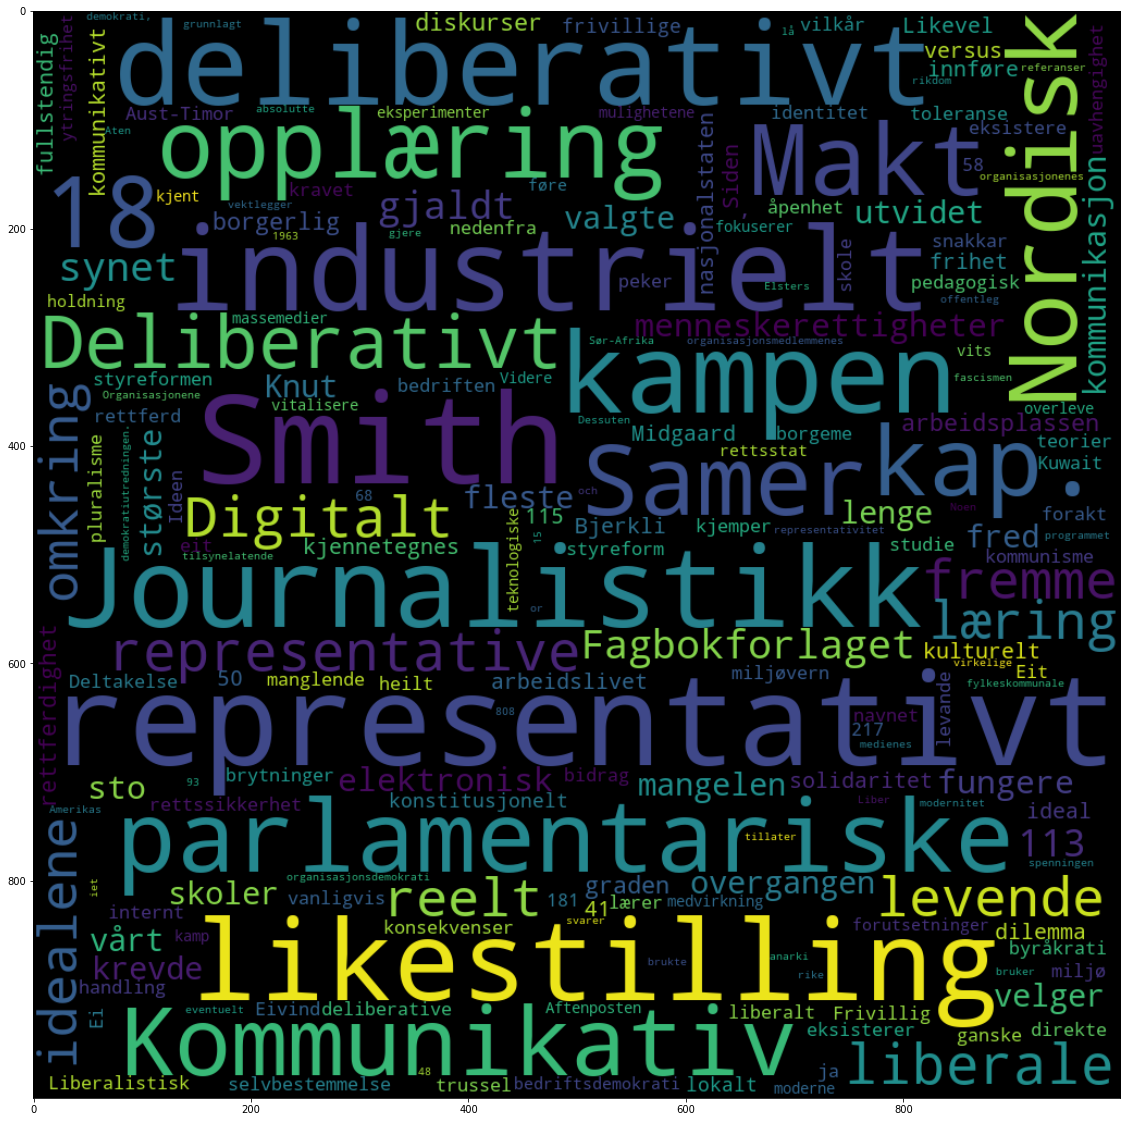

In [95]:
nb.cloud(nb.frame(delta_max.ratio))

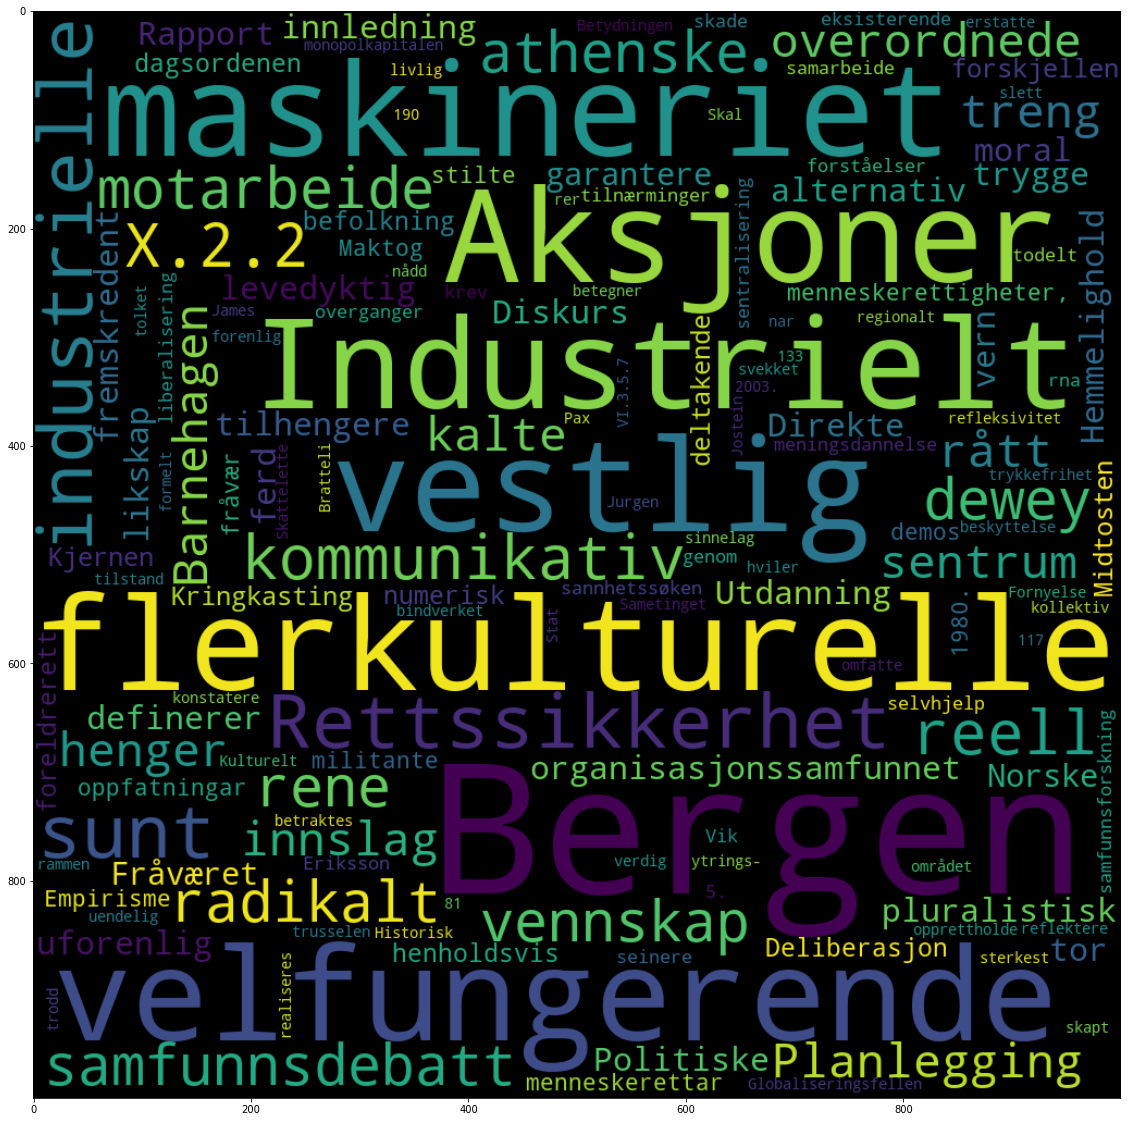

In [96]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))